# TP1 - EJ3 - Regresion

## Integrantes:


*   Mejia Alan Roberto - 91161

## Objetivos

El objetivo del presente ejercicio es predecir el precio de alquiler de una propiedad en funcion de los datos publicados en la plataforma AirBnB.

La ciudad a estudiar es: New York

# Importaciones

## Instalaciones

Una vez instaladas, comentarlas.

## Bibliotecas

In [120]:
# Manipulacion de datos y funciones matematicas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo lineal
from sklearn.linear_model import LinearRegression

# Metricas para evaluar modelos
from sklearn import metrics

## Datasets

In [121]:
df = pd.read_csv('listings.csv')


In [122]:
df_original = pd.read_csv('listings.csv')


# Analisis Exploratorio

En esta seccion se realiza un analisis necesario para comprender el dominio del problema.

## Forma del dataset

In [123]:
df.shape

(37541, 75)

In [124]:
(registros, variables) = df.shape
print("Cantidad de registros: " + str(registros))
print("Cantidad de variables: " + str(variables))

Cantidad de registros: 37541
Cantidad de variables: 75


## Variables

In [125]:
variables = df.columns.to_list()
variables

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

Hay muchas varaibles que no van a servir para predecir el valor del alquiler.

> ToDo: Seguir investigando sobre las variables que puedan o no servir para predecir.

In [126]:
columns_to_drop = ['listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'accommodates',
 'bathrooms_text',
 'amenities',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']


df = df.drop(columns=columns_to_drop, errors='ignore')


In [128]:
variables = df.columns.to_list()
variables

['id',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'price']

## Datos nulos

In [127]:
(df.isnull().sum() / len(df)) * 100

,0
id,0.000000
latitude,0.000000
longitude,0.000000
property_type,0.000000
room_type,0.000000
bathrooms,39.293040
bedrooms,15.558989
beds,39.652646
price,39.293040


## Tipos de datos de las variables del dataset

In [129]:
tipos = df.dtypes
print(tipos)

id                 int64
latitude         float64
longitude        float64
property_type     object
room_type         object
bathrooms        float64
bedrooms         float64
beds             float64
price             object
dtype: object


Observaciones:
* La variable price esta en formato string, hay que convertirlo en numerico

In [130]:
# prompt: Del dataframe df, necesito convertir los valores de la variable price a numerico. Su valor suele estar con el formato "$89.00" , necesito que se convierta a 89.00

# Replace '$' and ',' with empty strings, then convert to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [131]:
tipos = df.dtypes
print(tipos)

id                 int64
latitude         float64
longitude        float64
property_type     object
room_type         object
bathrooms        float64
bedrooms         float64
beds             float64
price            float64
dtype: object


## Inspeccion de registros

In [132]:
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price
0,739333866230665371,40.614310,-74.034440,Private room in rental unit,Private room,1.0,1.0,1.0,89.0
1,572612125615500056,40.639520,-74.014840,Private room in rental unit,Private room,1.0,1.0,1.0,45.0
2,45267941,40.850030,-73.922810,Private room in rental unit,Private room,1.0,1.0,1.0,107.0
3,838141198693830649,40.798718,-73.940093,Entire rental unit,Entire home/apt,2.0,3.0,3.0,140.0
4,1082660771919357919,40.668012,-73.985226,Entire home,Entire home/apt,2.5,4.0,4.0,340.0


In [133]:
df.tail()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,price
37536,943355797386691170,40.67608,-73.79630,Private room in home,Private room,1.0,1.0,1.0,65.0
37537,783387491435863626,40.76689,-73.87127,Entire rental unit,Entire home/apt,2.0,3.0,3.0,367.0
37538,45834849,40.76212,-73.87315,Private room in home,Private room,1.0,1.0,1.0,89.0
37539,53194676,40.82157,-73.80749,Entire home,Entire home/apt,1.0,1.0,1.0,185.0
37540,39483421,40.75994,-73.93135,Private room in home,Private room,NaN,NaN,NaN,NaN


## Lista variables categoricas

> ToDo: Inspeccionar, identicar y confirmar si realmente son ese tipo de dato o no.

In [134]:
variables_categoricas = ["id","property_type", "room_type"]
variables_categoricas

['id', 'property_type', 'room_type']

In [135]:
for variable in variables_categoricas:
  print(f"Valores posibles de la variable '{variable}': {df[variable].unique()}\n")

Valores posibles de la variable 'id': [739333866230665371 572612125615500056           45267941 ...
           45834849           53194676           39483421]

Valores posibles de la variable 'property_type': ['Private room in rental unit' 'Entire rental unit' 'Entire home'
 'Room in hotel' 'Entire condo' 'Entire townhouse' 'Private room in home'
 'Private room in townhouse' 'Private room in condo'
 'Entire serviced apartment' 'Shared room in rental unit' 'Entire loft'
 'Boat' 'Entire vacation home' 'Camper/RV' 'Entire guesthouse'
 'Shared room in condo' 'Room in serviced apartment'
 'Private room in bed and breakfast' 'Private room in serviced apartment'
 'Private room in guest suite' 'Shared room in home' 'Entire guest suite'
 'Private room in loft' 'Entire place' 'Private room in villa'
 'Entire cottage' 'Room in boutique hotel' 'Private room in farm stay'
 'Private room in lighthouse' 'Shared room in vacation home'
 'Private room in hostel' 'Entire home/apt' 'Private room in train'

## Lista variables Numericas

In [136]:
variables_numericas = [variable for variable in variables if variable not in variables_categoricas]
variables_numericas

['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'price']

## Estadisticos de variables numericas

In [137]:
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,beds,price
count,3.754100e+04,37541.000000,37541.000000,22790.000000,31700.000000,22655.000000,22790.000000
mean,3.783277e+17,40.728722,-73.946982,1.187297,1.385363,1.631296,232.891795
std,4.643902e+17,0.056340,0.054604,0.551219,0.941462,1.202048,1019.738134
min,2.595000e+03,40.500366,-74.251907,0.000000,0.000000,0.000000,8.000000
25%,2.063928e+07,40.688491,-73.983108,1.000000,1.000000,1.000000,85.000000
50%,4.866104e+07,40.726090,-73.954540,1.000000,1.000000,1.000000,147.000000
75%,8.450413e+17,40.762380,-73.927800,1.000000,2.000000,2.000000,250.000000
max,1.237702e+18,40.911390,-73.713650,15.500000,16.000000,42.000000,100000.000000


## Cantidad de Nulos

In [138]:
df.isnull().sum()

,0
id,0
latitude,0
longitude,0
property_type,0
room_type,0
bathrooms,14751
bedrooms,5841
beds,14886
price,14751


Porcentaje de nulos de cada variabes respecto del dataset.

In [139]:
(df.isnull().sum() / len(df)) * 100

,0
id,0.000000
latitude,0.000000
longitude,0.000000
property_type,0.000000
room_type,0.000000
bathrooms,39.293040
bedrooms,15.558989
beds,39.652646
price,39.293040


Observaciones:
* La variable price tiene casi un 40% de valores nulos. El dilema en preprocesamiento esta en se debera eliminar, porque sino se estaria influyendo en mediante la imputacion ese valor, el cual queremos predecir.

## Correlacion Lineal de variables

### Matriz de covarianza

In [140]:
matriz_covarianza = df.cov(numeric_only=True)
matriz_covarianza

,id,latitude,longitude,bathrooms,bedrooms,beds,price
id,2.156582e+35,3.271966e+14,6.828199e+14,1.699839e+16,2.463941e+16,-1.971592e+16,1.353826e+19
latitude,3.271966e+14,3.174232e-03,1.391490e-04,-1.854525e-03,-4.502327e-03,-3.775615e-03,7.723669e-01
longitude,6.828199e+14,1.391490e-04,2.981569e-03,-9.401564e-05,2.818841e-03,1.863759e-03,-3.549633e+00
bathrooms,1.699839e+16,-1.854525e-03,-9.401564e-05,3.038428e-01,2.186723e-01,2.540748e-01,4.483820e+01
bedrooms,2.463941e+16,-4.502327e-03,2.818841e-03,2.186723e-01,8.863500e-01,6.626278e-01,5.581239e+01
beds,-1.971592e+16,-3.775615e-03,1.863759e-03,2.540748e-01,6.626278e-01,1.444920e+00,9.681834e+01
price,1.353826e+19,7.723669e-01,-3.549633e+00,4.483820e+01,5.581239e+01,9.681834e+01,1.039866e+06


### Matriz de Correlacion

In [141]:
matriz_correlacion = df.corr(numeric_only=True)
matriz_correlacion

,id,latitude,longitude,bathrooms,bedrooms,beds,price
id,1.000000,0.012506,0.026928,0.064550,0.055281,-0.034371,0.027789
latitude,0.012506,1.000000,0.045231,-0.057550,-0.084868,-0.053629,0.012961
longitude,0.026928,0.045231,1.000000,-0.002850,0.053507,0.025861,-0.058156
bathrooms,0.064550,-0.057550,-0.002850,1.000000,0.408154,0.382885,0.079750
bedrooms,0.055281,-0.084868,0.053507,0.408154,1.000000,0.565649,0.056261
beds,-0.034371,-0.053629,0.025861,0.382885,0.565649,1.000000,0.078747
price,0.027789,0.012961,-0.058156,0.079750,0.056261,0.078747,1.000000


In [142]:
matriz_correlacion_absoluta = np.abs(matriz_correlacion)
matriz_correlacion_absoluta

,id,latitude,longitude,bathrooms,bedrooms,beds,price
id,1.000000,0.012506,0.026928,0.064550,0.055281,0.034371,0.027789
latitude,0.012506,1.000000,0.045231,0.057550,0.084868,0.053629,0.012961
longitude,0.026928,0.045231,1.000000,0.002850,0.053507,0.025861,0.058156
bathrooms,0.064550,0.057550,0.002850,1.000000,0.408154,0.382885,0.079750
bedrooms,0.055281,0.084868,0.053507,0.408154,1.000000,0.565649,0.056261
beds,0.034371,0.053629,0.025861,0.382885,0.565649,1.000000,0.078747
price,0.027789,0.012961,0.058156,0.079750,0.056261,0.078747,1.000000


> Se puede fijar un criterio para poder ver cuales son los valores que cumplen.

In [143]:
criterio_linealidad_min = 0.5
matriz_correlacion_con_criterio_linealidad = matriz_correlacion_absoluta[matriz_correlacion_absoluta > criterio_linealidad_min]
matriz_correlacion_con_criterio_linealidad

,id,latitude,longitude,bathrooms,bedrooms,beds,price
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,1.0,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.0,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,1.000000,0.565649,NaN
beds,NaN,NaN,NaN,NaN,0.565649,1.000000,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### Heatmap

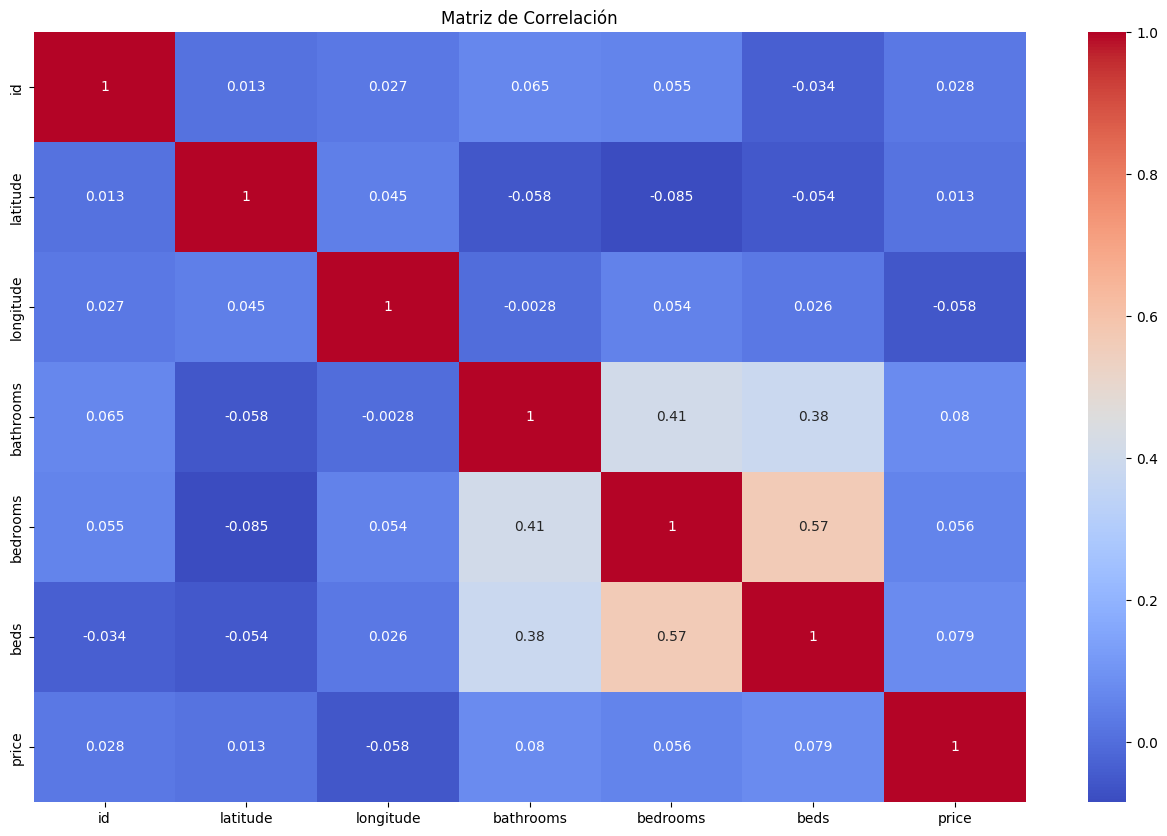

In [144]:
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

#### Pairplot

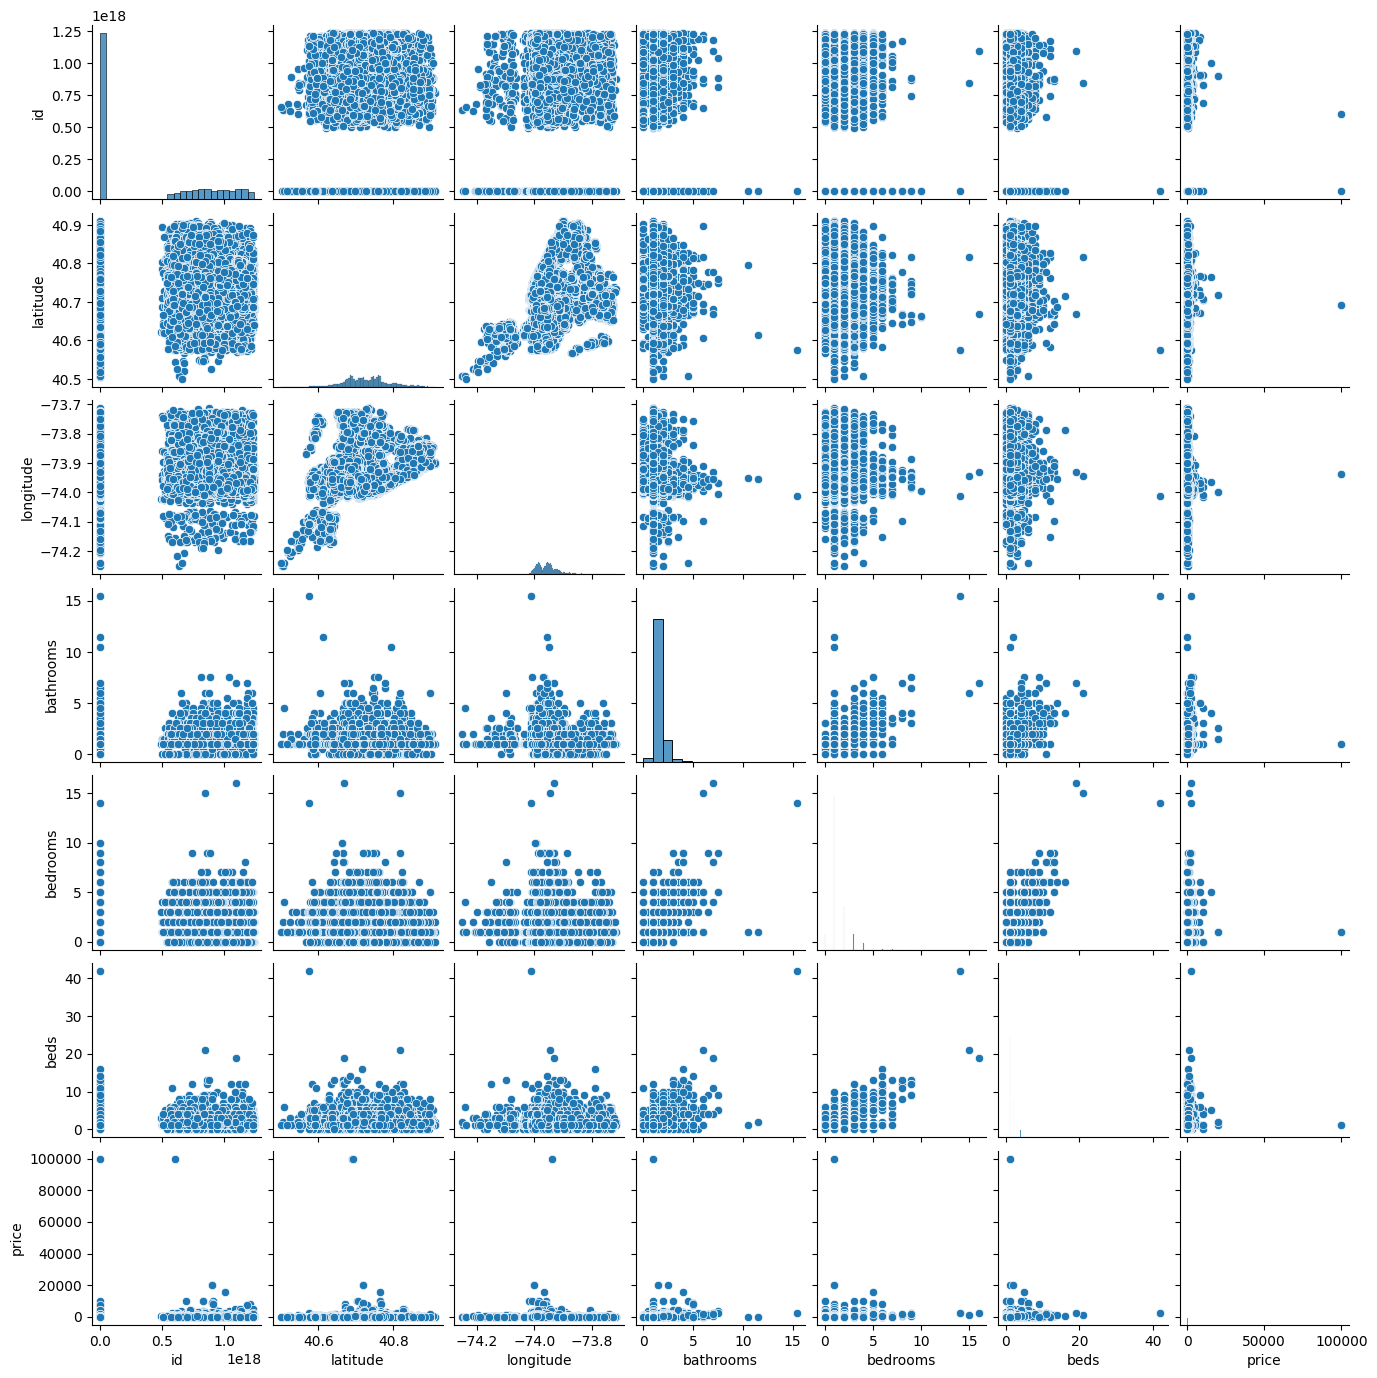

In [145]:
sns.pairplot(df, height = 2)
plt.show()

# Preprocesamiento

En esta seccion se analiza y realiza limpieza de datos, generaciones de nuevos features, etc.

> En esta etapa se realizara copias del dataset para conservar la integridad

## Eliminar variables

## Nuevos Features

# Entrenamiento y Prediccion